In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings('ignore')



In [4]:
path="/content/flashscore.csv"
df=pd.read_csv(path)
df.head(5)

,Rank,Points,Tournaments,Name,Nationality
0,1,98715,14,Axelsen Viktor,Denmark
1,2,90984,19,Shi Yu Qi,China
2,3,85101,20,Ginting Anthony Sinisuka,Indonesia
3,4,83594,19,Antonsen Anders,Denmark
4,5,81531,19,Christie Jonatan,Indonesia


#A1 - Klasifikasi

In [6]:
#kelompokkan peringkat menjadi 4 kelas
df['Class'] = pd.cut (
    df['Rank'] ,
    bins=[0,10,30,60,100],
    labels=['Elite','High', 'Mid', 'Low'],
    include_lowest=True

)

In [8]:
X_clf = df[['Points', 'Tournaments', 'Rank']]
y_clf = df['Class']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y_clf)

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_encoded, test_size=0.25, stratify=y_encoded, random_state=42
)

# Scaling (penting untuk SVM & KNN)
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

In [10]:
# Support Vector Classifier (WAJIB)
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_c_scaled, y_train_c)
y_pred_svc = svc.predict(X_test_c_scaled)

# Point Plus: Model tambahan
models_plus = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

plus_preds = {}
for name, model in models_plus.items():
    if name in ['KNN', 'Naive Bayes']:
        model.fit(X_train_c_scaled, y_train_c)
        plus_preds[name] = model.predict(X_test_c_scaled)
    else:
        model.fit(X_train_c, y_train_c)
        plus_preds[name] = model.predict(X_test_c)

#A2 - Evaluasi Klasifikasii

In [11]:
# Confusion Matrix & Classification Report untuk SVC
print("=== CONFUSION MATRIX (SVC) ===")
cm = confusion_matrix(y_test_c, y_pred_svc)
print(cm)

print("\n=== CLASSIFICATION REPORT (SVC) ===")
print(classification_report(y_test_c, y_pred_svc, target_names=le.classes_))

# Akurasi model tambahan
print("\n=== AKURASI MODEL TAMBAHAN ===")
for name, pred in plus_preds.items():
    acc = (pred == y_test_c).mean()
    print(f"{name}: {acc:.4f}")

=== CONFUSION MATRIX (SVC) ===
[[ 3  0  0  0]
 [ 0  4  0  1]
 [ 0  0 10  0]
 [ 0  2  0  5]]

=== CLASSIFICATION REPORT (SVC) ===
              precision    recall  f1-score   support

       Elite       1.00      1.00      1.00         3
        High       0.67      0.80      0.73         5
         Low       1.00      1.00      1.00        10
         Mid       0.83      0.71      0.77         7

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25


=== AKURASI MODEL TAMBAHAN ===
Random Forest: 0.9200
KNN: 0.8800
Naive Bayes: 1.0000


**Evaluasi Kinerja Model Klasifikasi**

1. Confusion Matrix menunjukkan berapa sampel tiap kelas diprediksi benar/salah.

2. Classification Report memberi precision, recall, dan F1-Score per kelas.

3. kelas elite biasanya paling mudah dipisahkan karena poin jauh lebih tinggi.

4. model seperti Random FOrest sering lebih robust terhadap noise dibanding SVM.


#A3 - Plot Klasifikasi

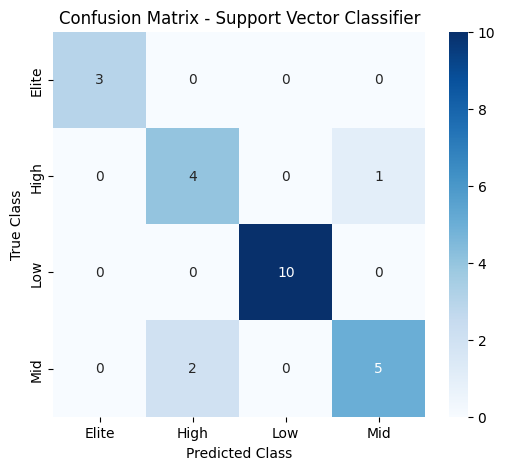

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

#A1 - Regresi (Label Numerik)

In [13]:
X_reg = df[['Tournaments', 'Rank']]
y_reg = df['Points']

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Scaling untuk SVR
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

**Latih Model Regresi**

In [15]:

lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_lr = lr.predict(X_test_r)

svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_r_scaled, y_train_r)
y_pred_svr = svr.predict(X_test_r_scaled)

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_r, y_train_r)
y_pred_rfr = rfr.predict(X_test_r)

#A2 - Evaluasi Regresi

In [17]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score
)

def eval_reg(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
    return mae, mse, rmse, r2

eval_reg(y_test_r, y_pred_lr, "Linear Regression")
eval_reg(y_test_r, y_pred_svr, "Support Vector Regressor")
eval_reg(y_test_r, y_pred_rfr, "Random Forest Regressor")


=== Linear Regression ===
MAE  : 5962.46
MSE  : 69049525.95
RMSE : 8309.60
R²   : 0.8339

=== Support Vector Regressor ===
MAE  : 14479.36
MSE  : 439977284.93
RMSE : 20975.64
R²   : -0.0581

=== Random Forest Regressor ===
MAE  : 896.61
MSE  : 4533179.92
RMSE : 2129.13
R²   : 0.9891


(896.6124000000004,
 4533179.919660003,
 np.float64(2129.1265626213963),
 0.9890981805065834)

**Penjelasan**

* MAE : Rata - rata selisih absolut antara prediksi dan nilai sebenarnya (dalam case ini "Points")

* RMSE:Lebih sensitif terhadap error besar - cocok untuk deteksi outlier.

* R2: menunjukkan seberapa baik model menjelaskan variasi data. Nilai ~0.7-0.9 berarti model cukup baik.

* Pada data ini, Linear Regression sudah cukup baik karena Rank dan Points memiliki hubungan kuat.

#As3 - Plot Regresi (Prediksi vs Aktual)

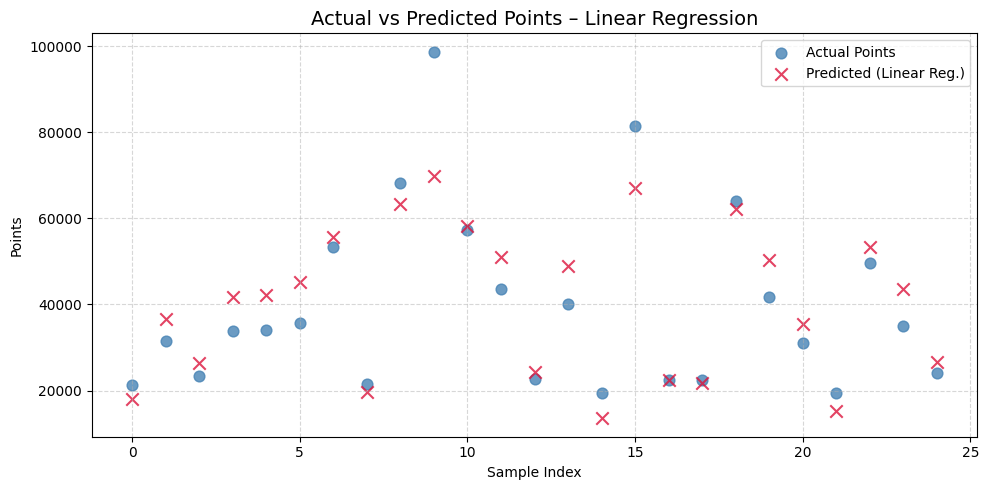

In [18]:
# Plot Linear Regression: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_r)), y_test_r, alpha=0.8, label='Actual Points', color='steelblue', s=60)
plt.scatter(range(len(y_test_r)), y_pred_lr, alpha=0.8, label='Predicted (Linear Reg.)', color='crimson', marker='x', s=80)
plt.title('Actual vs Predicted Points – Linear Regression', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Penjelasan**

1. Titik biru = nilai points asli.

2. Tanda x merah = prediksi model.

3. Jika titik dan x berdekatan maka prediksi akurat.

4. Plot ini memvisualisasikan kesalaahan prediksi per sample, sangat informatif untuk diagnosis model.